In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [197]:
df=pd.read_csv('train.csv')

In [198]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [121]:
df.shape

(45211, 11)

In [122]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [123]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [124]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [125]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# DATA CLEANING

In [126]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [127]:
df.duplicated().sum()

6

In [128]:
df = df.drop_duplicates()

In [129]:
df.duplicated().sum()

0

# DATA TYPES

In [130]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# categorical columns

In [131]:
print(df['job'].unique())
print(df['marital'].unique())
print(df['education_qual'].unique())
print(df['call_type'].unique())
print(df['mon'].unique())
print(df['prev_outcome'].unique())
print(df['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


# EXPLORING DATASET

In [187]:
df['target'] = df["y"].map({"yes":1 , "no":0})

In [188]:
df.head()

,age,education_qual,day,mon,dur,num_calls,y,target,call_type_cellular,call_type_telephone,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,58,1,5,5,261,1,0,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,2,5,5,151,1,0,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0
2,33,2,5,5,76,1,0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
3,47,2,5,5,92,1,0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
4,33,2,5,5,198,1,0,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df.age.value_counts()
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

In [28]:
df.job.value_counts()
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [29]:
df.job.isnull().sum()

0

In [30]:
df.marital.value_counts()
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [31]:
df.education_qual.value_counts()
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086277
secondary    0.105608
tertiary     0.150086
unknown      0.135703
Name: target, dtype: float64

In [32]:
df.education_qual.isnull().sum()

0

In [33]:
df.call_type.value_counts()
df.groupby('call_type')['target'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [34]:
df.call_type.isnull().sum()

0

In [35]:
df.day.value_counts()
df.groupby('day')['target'].mean()

day
1     0.279503
2     0.140867
3     0.164968
4     0.159170
5     0.112565
6     0.093685
7     0.086406
8     0.109239
9     0.114744
10    0.230916
11    0.122380
12    0.152215
13    0.152050
14    0.113636
15    0.139753
16    0.135689
17    0.090768
18    0.098787
19    0.069476
20    0.069767
21    0.099210
22    0.170166
23    0.134185
24    0.138702
25    0.158333
26    0.112077
27    0.133809
28    0.078185
29    0.073926
30    0.173052
31    0.071540
Name: target, dtype: float64

In [36]:
df.mon.value_counts()
df.groupby('mon')['target'].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [37]:
df.dur.value_counts()
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1573, dtype: float64

In [38]:
df.num_calls.value_counts()
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145992
2     0.112053
3     0.111936
4     0.090057
5     0.078798
6     0.071263
7     0.063946
8     0.059259
9     0.064220
10    0.052632
11    0.079602
12    0.025806
13    0.045113
14    0.043011
15    0.047619
16    0.025316
17    0.086957
18    0.000000
19    0.000000
20    0.023256
21    0.028571
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.062500
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
63    0.000000
Name: target, dtype: float64

In [39]:
df.prev_outcome.value_counts()
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [40]:
df.y.value_counts()
df.groupby('y')['target'].mean()

y
no     0.0
yes    1.0
Name: target, dtype: float64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
 11  target          45205 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


# OUTLIER detect and remove

# AGE 

<Axes: xlabel='age'>

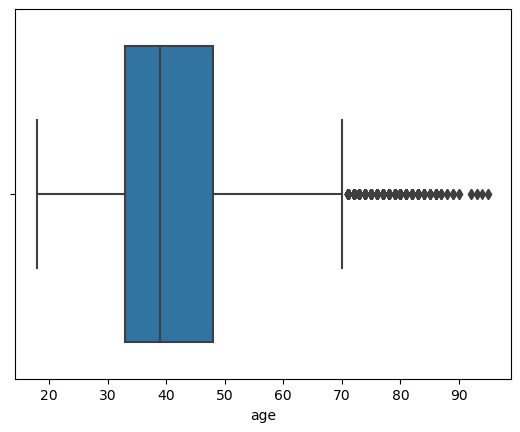

In [42]:
sb.boxplot(data=df,x='age')

##### there are many dots 

In [43]:
upper_limit = df['age'].mean() + 3*df['age'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 72.7944776621785
lower_limit: 9.079695548749498


In [44]:
df.age = df.age.clip(9.0,72.8)


In [45]:
df.age.describe()

count    45205.000000
mean        40.890760
std         10.459189
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         72.800000
Name: age, dtype: float64

<Axes: xlabel='age'>

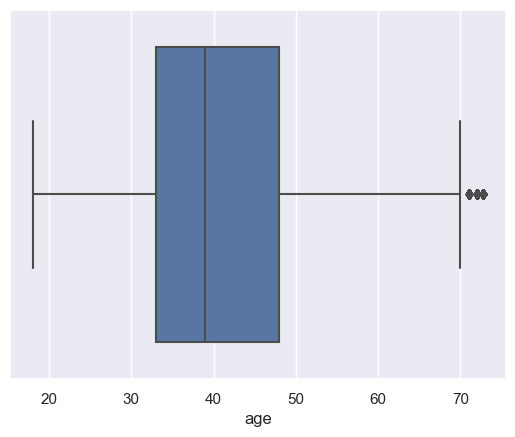

In [46]:
sb.set(style='darkgrid')
sb.boxplot(x=df['age'])

# DAY

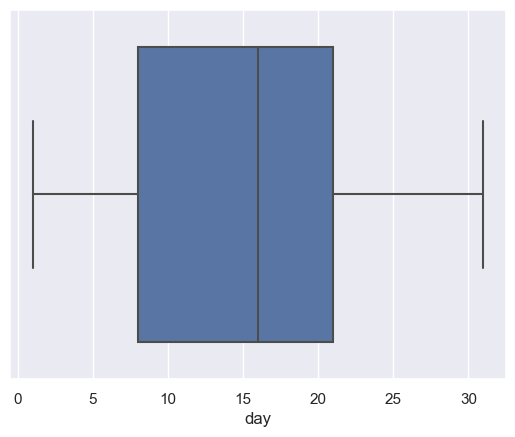

In [47]:
sb.boxplot(data=df,x='day')
sb.set_style('darkgrid')

In [48]:
upper_limit = df['day'].mean() + 3*df['day'].std()
lower_limit = df['age'].mean() - 3*df['age'].std()
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 40.773900998003484
lower_limit: 9.513193091381687


In [49]:
df.day.describe()

count    45205.00000
mean        15.80688
std          8.32234
min          1.00000
25%          8.00000
50%         16.00000
75%         21.00000
max         31.00000
Name: day, dtype: float64

# DURATION

<Axes: xlabel='dur'>

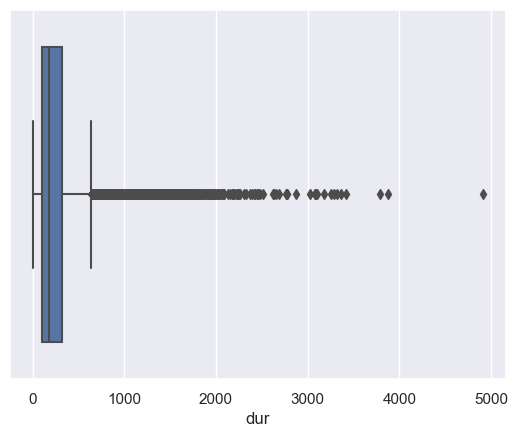

In [50]:
sb.boxplot(data=df,x='dur')

###### PERCENTILE 

In [51]:
percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

NameError: name 'percentile' is not defined

In [ ]:
df.dur = df.dur.clip(-221.0,643.0)

In [ ]:
df.dur.describe()

<Axes: xlabel='dur'>

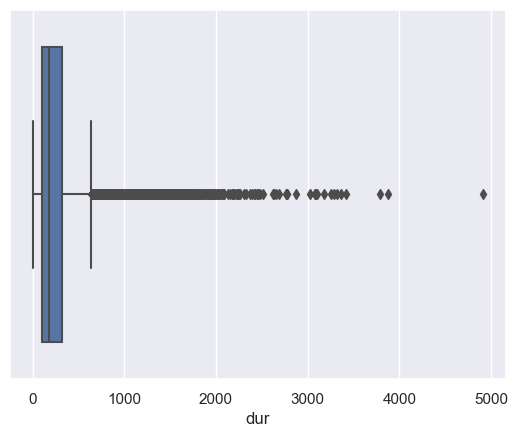

In [54]:
sb.set(style='darkgrid')
sb.boxplot(x=df['dur'])

# NUMBER OF CALLS

<Axes: xlabel='num_calls'>

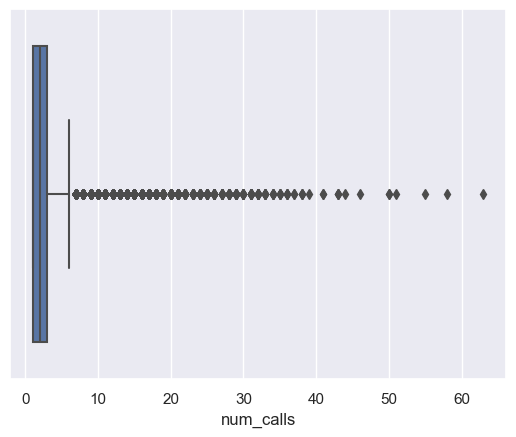

In [53]:
sb.boxplot(data=df,x='num_calls')

In [ ]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

In [ ]:
df.num_calls = df.num_calls.clip(-2,6.0)

In [ ]:
df.num_calls.describe()

<Axes: xlabel='num_calls'>

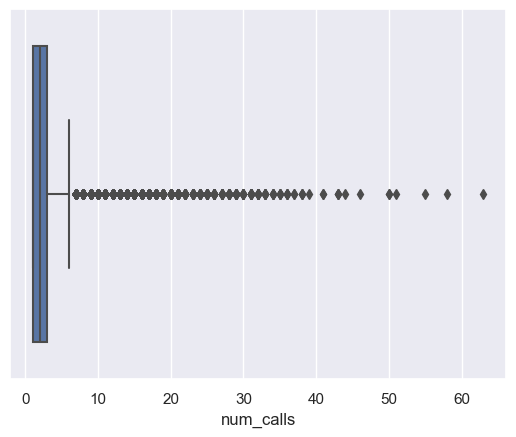

In [55]:
sb.set(style="darkgrid")
sb.boxplot(x=df['num_calls'])

# EDA (Exploratory Data Analysis)

# AGE COLLECTION

Text(0, 0.5, 'Count')

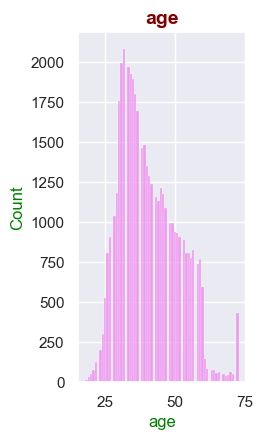

In [57]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,1)

sb.histplot((df.age),color='Violet')

plt.title('age', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('age',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green') 

# JOB COLLECTION

Text(0, 0.5, 'Count')

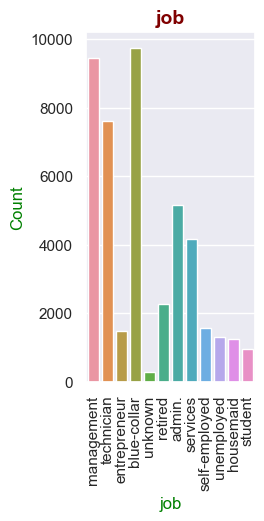

In [58]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,2)
sb.countplot(data=df,x='job')

plt.title('job', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('job',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green') 

# MARITAL COLECTION

Text(0, 0.5, 'Count')

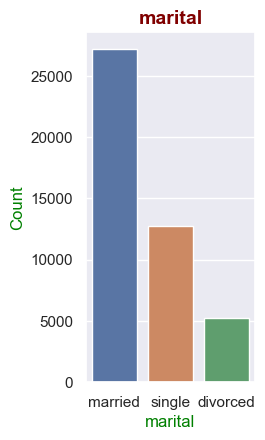

In [59]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,3)
custom_color = {'married':'blue' , 'single':'red' , 'divorced':'green'} 
sb.countplot(data=df,x='marital')

plt.title('marital', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('marital',fontsize = 12, color='green') 
plt.xticks(rotation = 360) 
plt.ylabel('Count',fontsize = 12, color='green') 

# EDUCATION COLLECTION

Text(0, 0.5, 'Count')

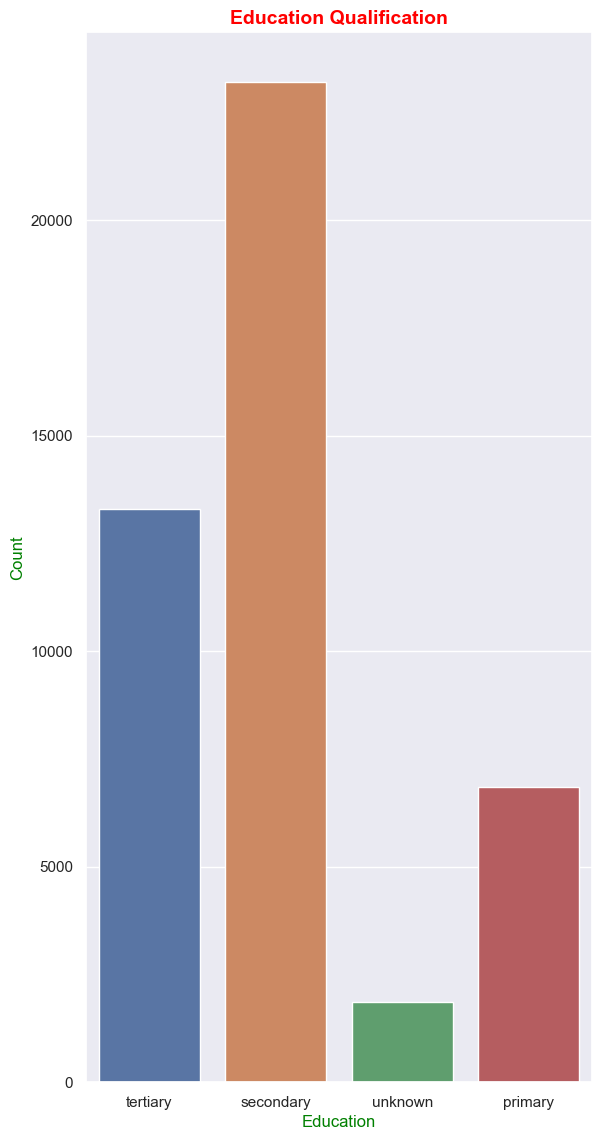

In [60]:
plt.figure(figsize = (30,30),dpi=100)  
plt.subplot(2,4,4)
custom_colors = {'secondary': 'DarkGreen', 'tertiary': 'LightSeaGreen', 'primary': 'Aquamarine'}
sb.countplot(data=df,x='education_qual')


plt.title('Education Qualification', fontsize = 14, color='red', fontweight='bold') 
plt.xlabel('Education',fontsize = 12, color='green') 
plt.xticks(rotation = 360) 
plt.ylabel('Count',fontsize = 12, color='green') 

# CALL_TYPE COLLECTION

Text(0, 0.5, 'Count')

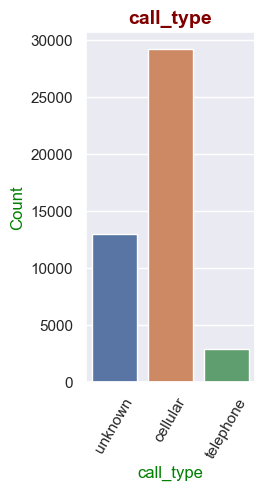

In [61]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,5)
sb.countplot(data=df,x='call_type')


plt.title('call_type', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('call_type',fontsize = 12, color='green') 
plt.xticks(rotation = 60) 
plt.ylabel('Count',fontsize = 12, color='green') 

# DAY COLLECTION

Text(0, 0.5, 'Count')

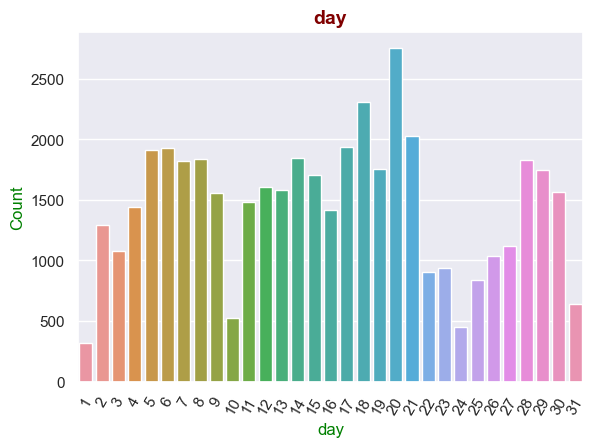

In [62]:
plt.figure(figsize = (30,10),dpi=100)  
plt.subplot(2,4,6)
sb.countplot(data=df,x='day')

plt.title('day', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('day',fontsize = 12, color='green') 
plt.xticks(rotation = 60) 
plt.ylabel('Count',fontsize = 12, color='green') 

# MONTH COLLECTION

Text(0, 0.5, 'Count')

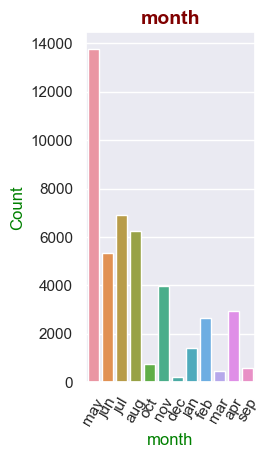

In [63]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,7)
sb.countplot(data=df,x='mon')


plt.title('month', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('month',fontsize = 12, color='green') 
plt.xticks(rotation = 60) 
plt.ylabel('Count',fontsize = 12, color='green') 

# DURATION COLLECTION

Text(0, 0.5, 'Count')

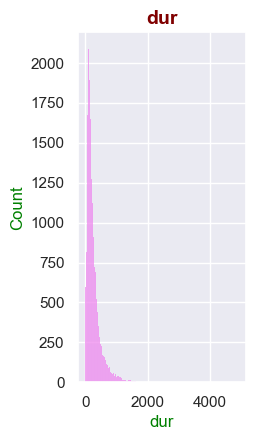

In [64]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,8)
sb.histplot((df.dur),color='Violet')


plt.title('dur', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('dur',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green') 

# NUMBER OF CALLS COLLECTION

Text(0, 0.5, 'Count')

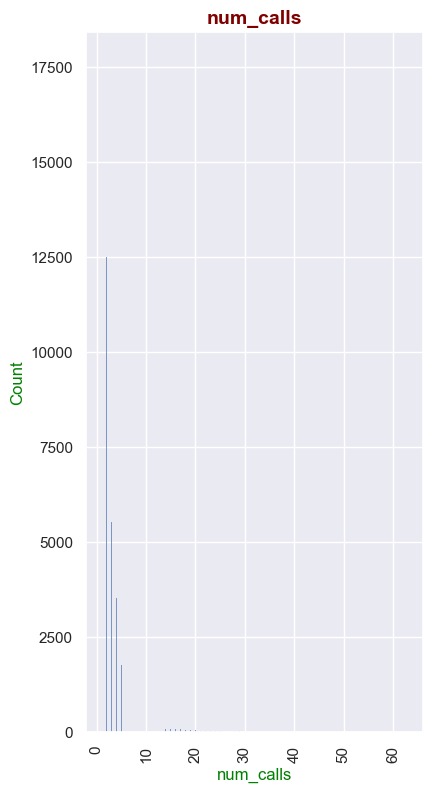

In [65]:
plt.figure(figsize = (20,20),dpi=100)  
plt.subplot(2,4,6)
sb.histplot(df['num_calls']) 



plt.title('num_calls', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('num_calls',fontsize = 12, color='green') 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 12, color='green') 

# TARGET COLLECTION

Text(0, 0.5, 'Count')

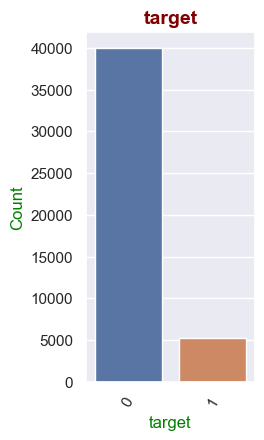

In [66]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,7)
sb.countplot(data=df,x='target')
custom_colors = {'no': 'Yellow', 'yes': 'blue'}



plt.title('target', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('target',fontsize = 12, color='green') 
plt.xticks(rotation = 60) 
plt.ylabel('Count',fontsize = 12, color='green') 

# PREVOIUS OUTCOME COLLECTION

Text(0, 0.5, 'Count')

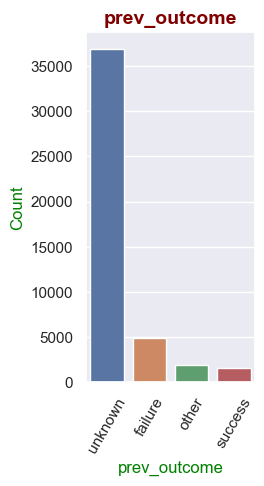

In [67]:
plt.figure(figsize = (10,10),dpi=100)  
plt.subplot(2,4,7)
sb.countplot(data=df,x='prev_outcome')




plt.title('prev_outcome', fontsize = 14, color='maroon', fontweight='bold') 
plt.xlabel('prev_outcome',fontsize = 12, color='green') 
plt.xticks(rotation = 60) 
plt.ylabel('Count',fontsize = 12, color='green') 

# OBSERVATION POINTS

#### AGE > MAIN TARGET : 30 TO 45 yrs                                                                                                                                                                       
> LEAST  TARGET :BELOW 25 TO ABOVE 75

#### JOB > MAIN TARGET : MANAGEMENT AND BLUE_COLLAR                                                                                                          

> LEAST TARGET : RETIRED AND STUDENTS

#### MARITAL > MAIN TARGET : MARRIED                                                                                                                                                       

> LEAST TARGET : DIVORCED

#### EDUCATION_QUAL > MAIN TARGET : SECONDARY                                                                                                                             

> LEAST TARGET : UNKNOWN  

#### CALL_TYPE > MAIN TARGET : CELLULAR                                                                                                                                              

> LEAST TARGET : TELEPHONE

#### DAY > MAIN TARGET : 18 AND 21 (IN MIDDLE OF TH MONTH)                                                                                                              

> LEAST TARGET : 01 (BY STARTING THE MONTH)

#### MONTH > MAIN TARGET : MAY(BY FINANCIAL YEAR)                                                                                                                           

> LEAST TARGET : DECEMBER

#### DURATION > MAIN TARGET : 2000 TO 2300 SECONDS                                                                                                                        

> LEAST TARGET : 18 TO 112  SECONDS

#### NUM_CALLS > MAIN TARGET : (01, 02) MORE PEOPLE ARE ATTENDING CALLS                                                                          

> LEAST TARGET : (03 TO 05) LESS PEOPLE ARE ATTENDING THE CALLS

#### PREV_OUTCOME            > MAIN TARGET : UNKNOWN (MOST PEOPLE HAVE BEEN UNKNOWN)                                                             

> LEAST TARGET : SUCCESS (LESS PEOLPE HAVE BEEN SUCCESS)

#### TARGET                            > MAIN TARGET : MORE PEOPLES ARE NOT INSURED                                                                                                        

> LEAST TARGET : ONLY LESS PEOPLES ARE INSURED 










# FEATURES VS TARGET

## CATEGORICAL DATA VS TARGET

C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\1575475979.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)
C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\1575475979.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,2)
C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\1575475979.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,3)


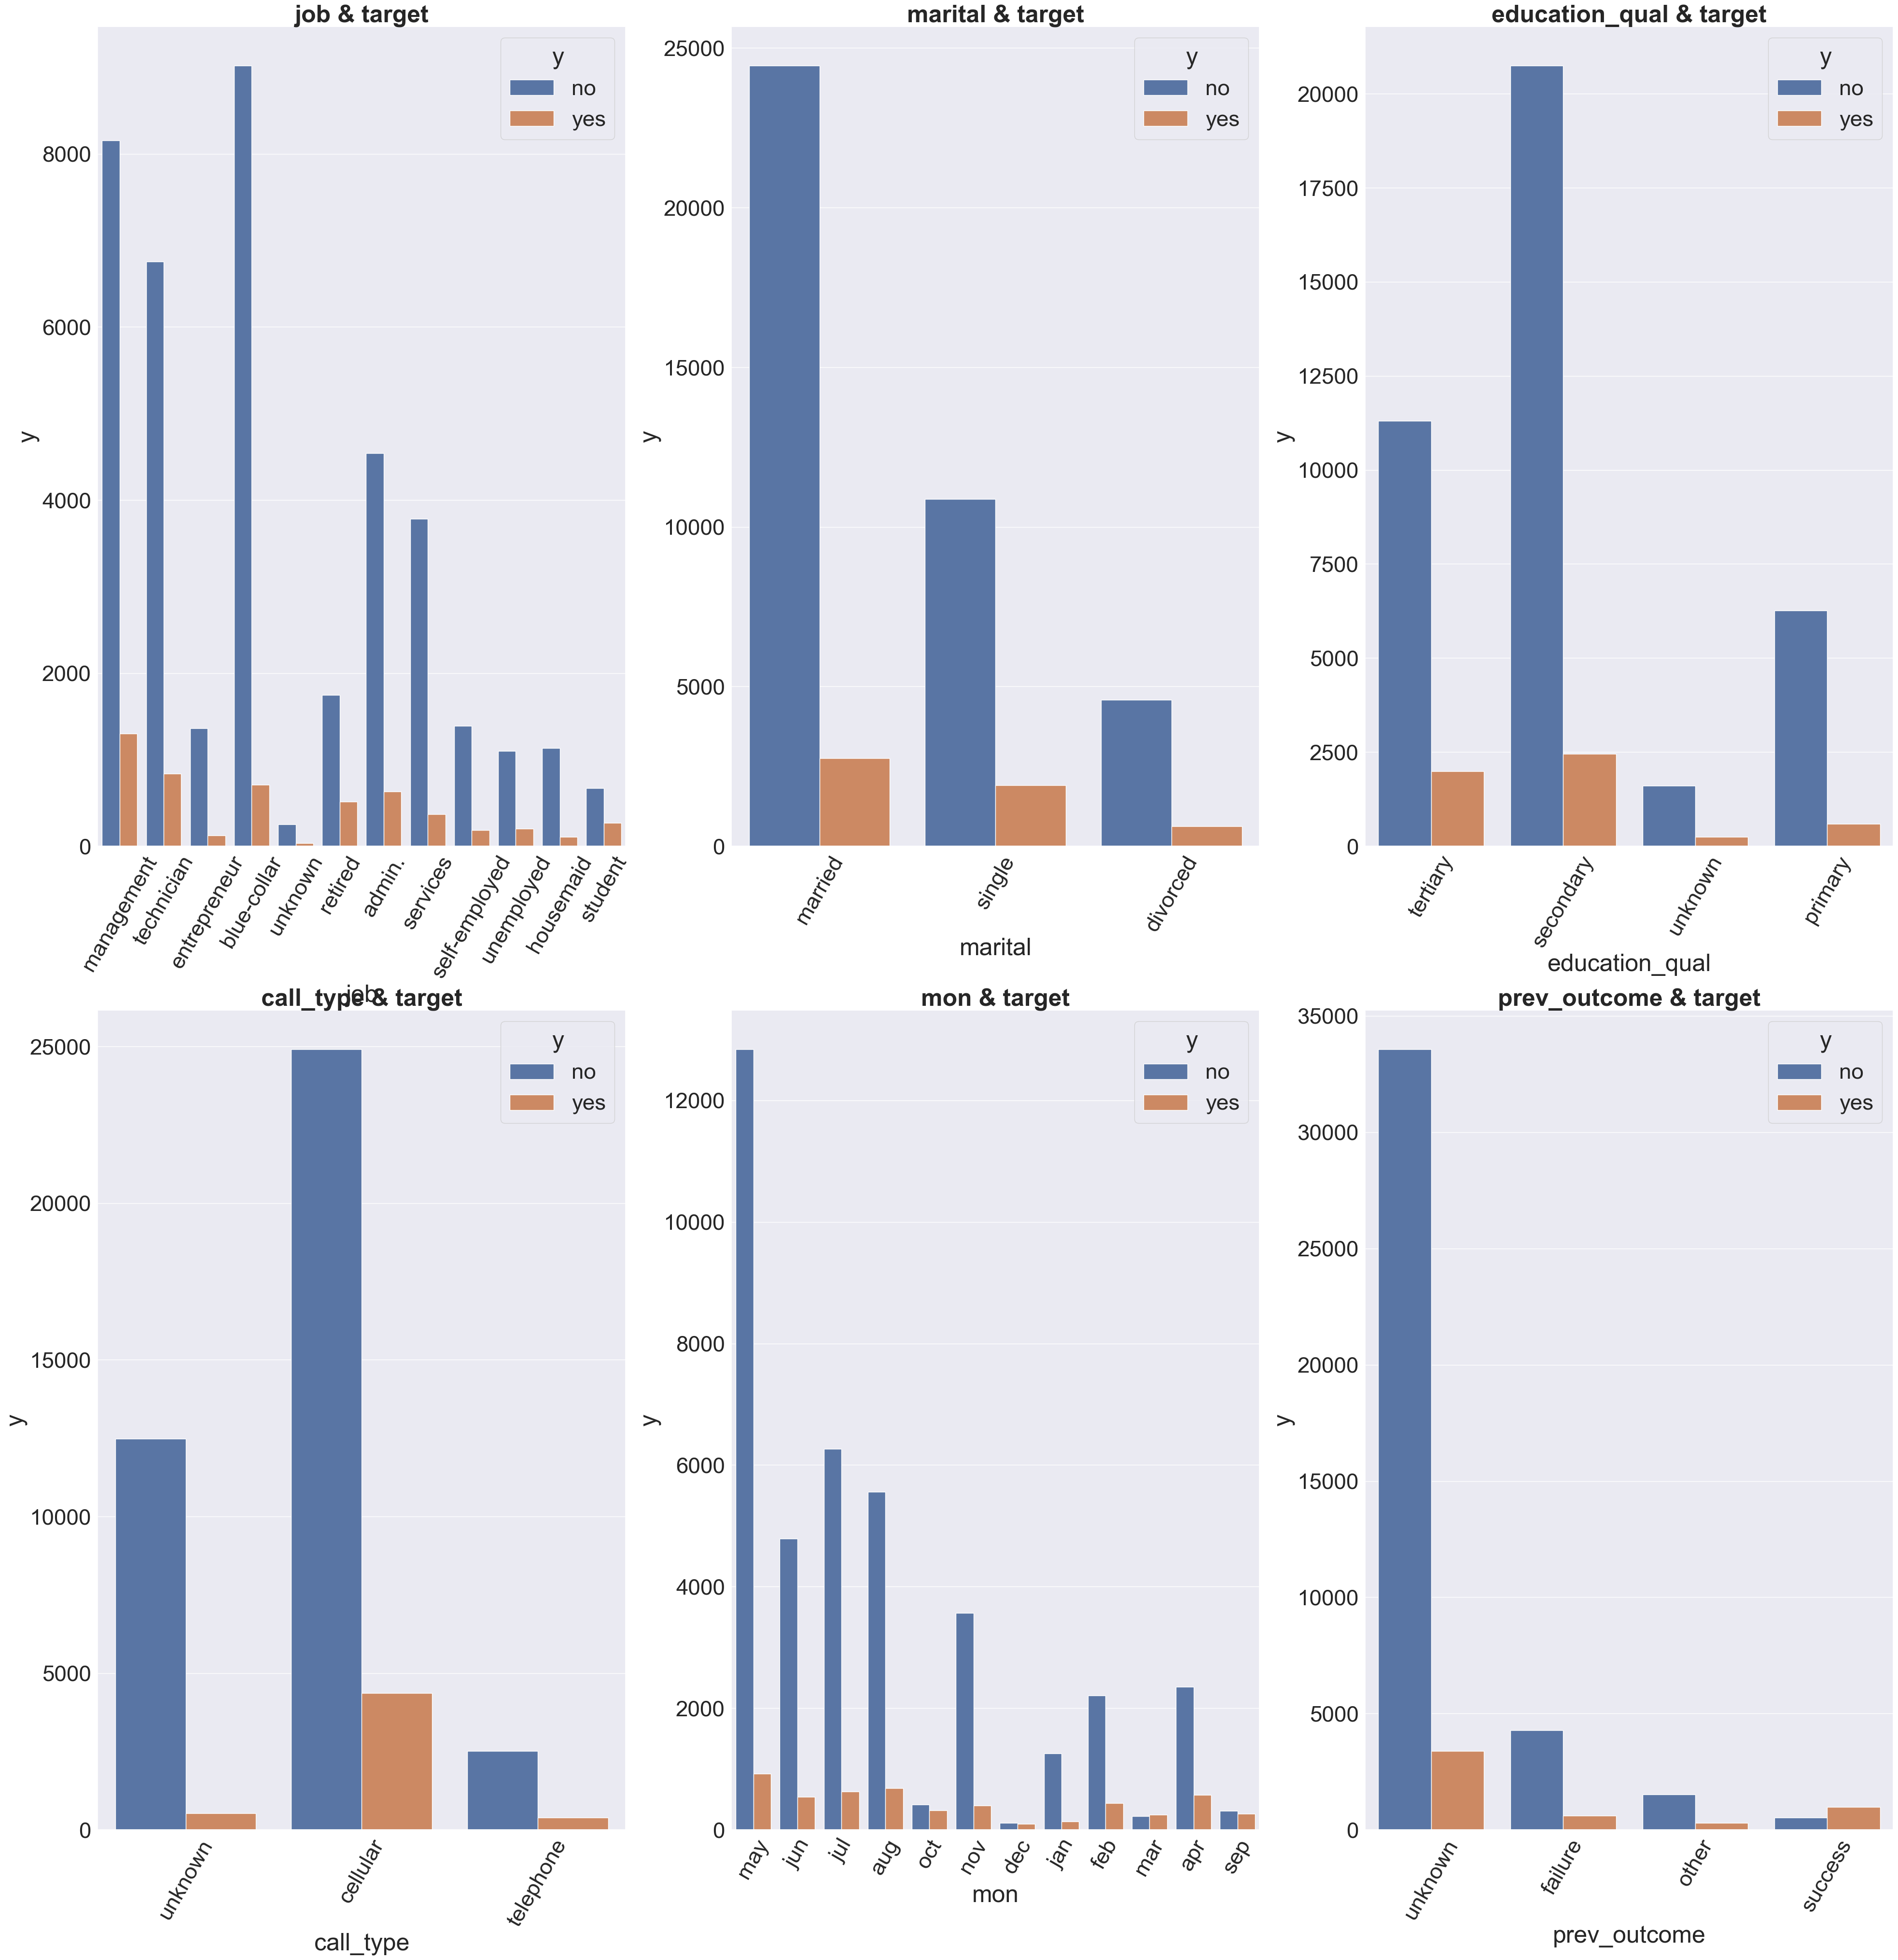

In [68]:
fig, axs = plt.subplots(ncols=7)
sb.set(font_scale=3)

#JOB
plt.subplot(3,3,1)
sb.countplot(x='job',hue='y',data=df)
plt.xlabel('job')
plt.ylabel('y')
plt.title('job & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)


#MARITAL
plt.subplot(3,3,2)
sb.countplot(x='marital',hue='y',data=df)
plt.xlabel('marital')
plt.ylabel('y')
plt.title('marital & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)


#education_qual
plt.subplot(3,3,3)
sb.countplot(x='education_qual',hue='y',data=df)
plt.xlabel('education_qual')
plt.ylabel('y')
plt.title('education_qual & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)


#call_type
plt.subplot(3,3,4)
sb.countplot(x='call_type',hue='y',data=df)
plt.xlabel('call_type')
plt.ylabel('y')
plt.title('call_type & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)


#MONTH
plt.subplot(3,3,5)
sb.countplot(x='mon',hue='y',data=df)
plt.xlabel('mon')
plt.ylabel('y')
plt.title('mon & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)




#PREVIOUS OUTCOME
plt.subplot(3,3,6)
sb.countplot(x='prev_outcome',hue='y',data=df)
plt.xlabel('prev_outcome')
plt.ylabel('y')
plt.title('prev_outcome & target',fontweight='bold')
plt.xticks(rotation=60)
fig.set_figheight(75)
fig.set_figwidth(48)





plt.show()

### FEATURE AND TARGET PERCENTAGES

y                no   yes
job                      
admin.         4539   631
blue-collar    9022   708
entrepreneur   1364   123
housemaid      1131   109
management     8156  1301
retired        1748   516
self-employed  1392   187
services       3784   369
student         669   269
technician     6756   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'Percentage')

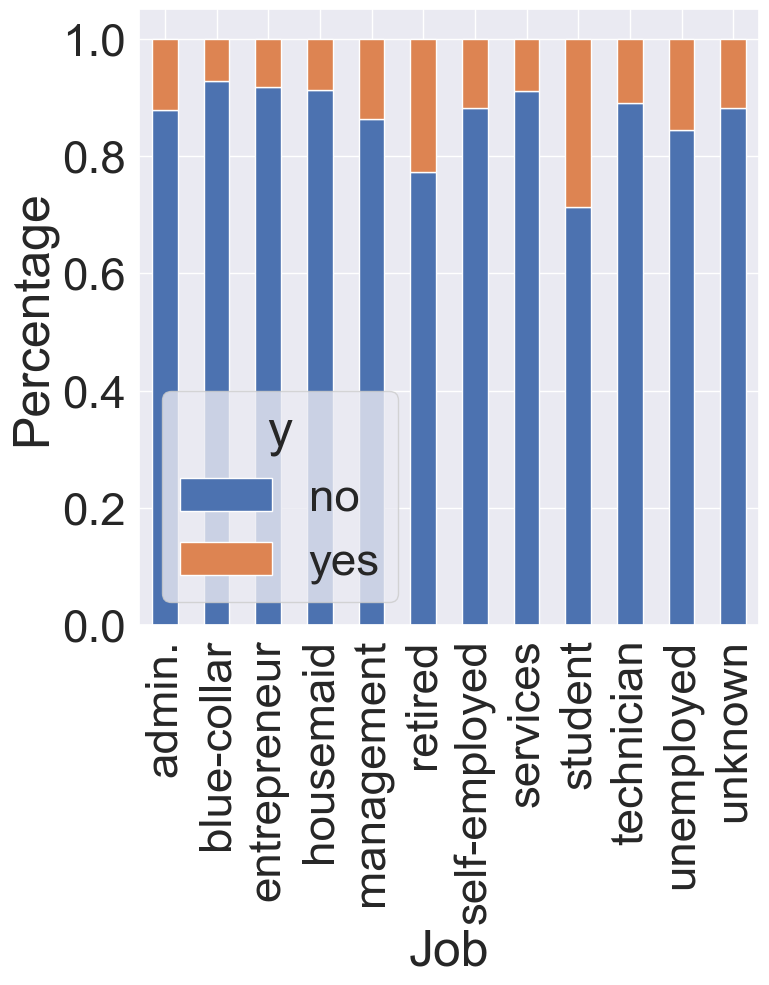

In [69]:
print(pd.crosstab(df['job'],df['y']))

job=pd.crosstab(df['job'],df['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

y                  no   yes
education_qual             
primary          6259   591
secondary       20749  2450
tertiary        11303  1996
unknown          1605   252


Text(0, 0.5, 'Percentage')

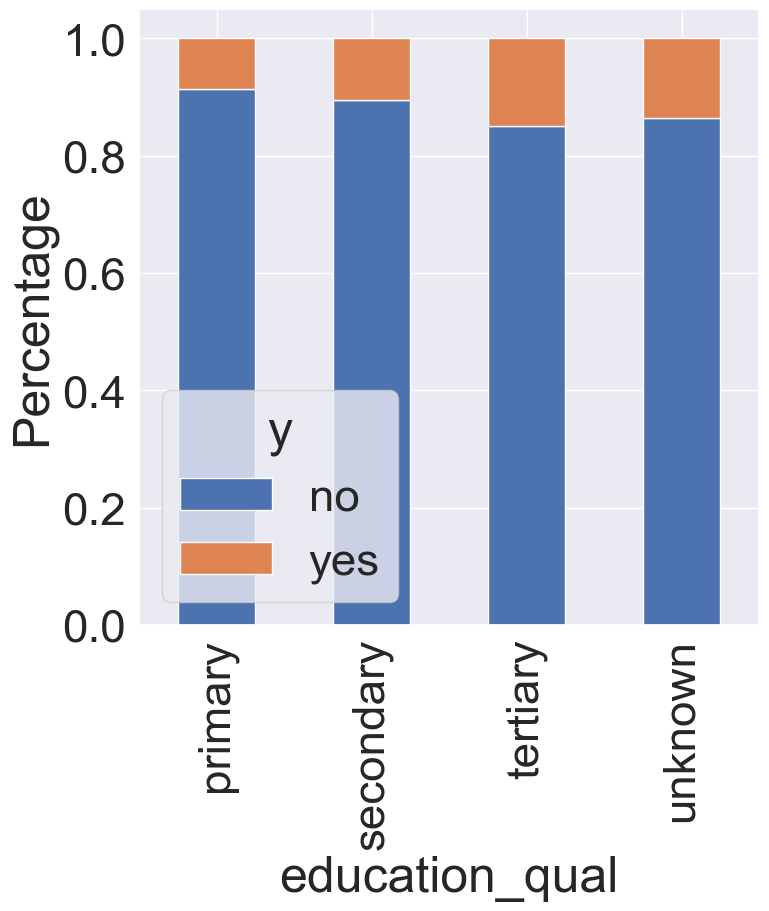

In [70]:
print(pd.crosstab(df['education_qual'],df['y']))

education_qual=pd.crosstab(df['education_qual'],df['y'])
education_qual.div(education_qual.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('education_qual')
plt.ylabel('Percentage')

y            no   yes
marital              
divorced   4585   622
married   24455  2755
single    10876  1912


Text(0, 0.5, 'Percentage')

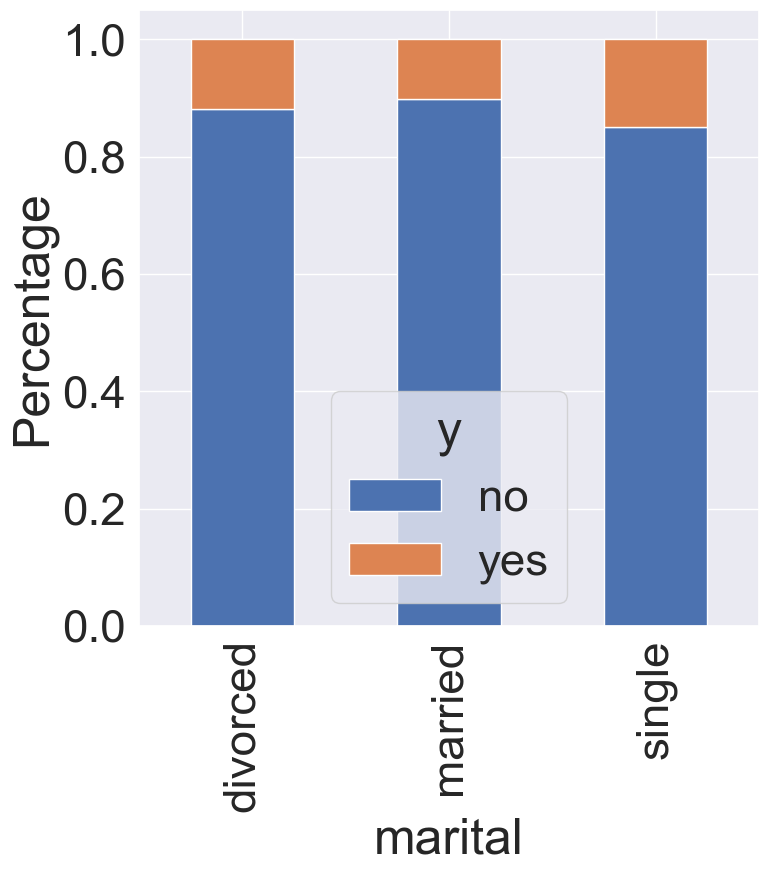

In [71]:
print(pd.crosstab(df['marital'],df['y']))

marital=pd.crosstab(df['marital'],df['y'])
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

In [72]:
df['y'].replace('no', 0,inplace=True)
df['y'].replace('yes', 1,inplace=True)

In [74]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

## NUMERCIAL VS TARGET

C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\3097340824.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)
C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\3097340824.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,2)
C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\3097340824.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,3)


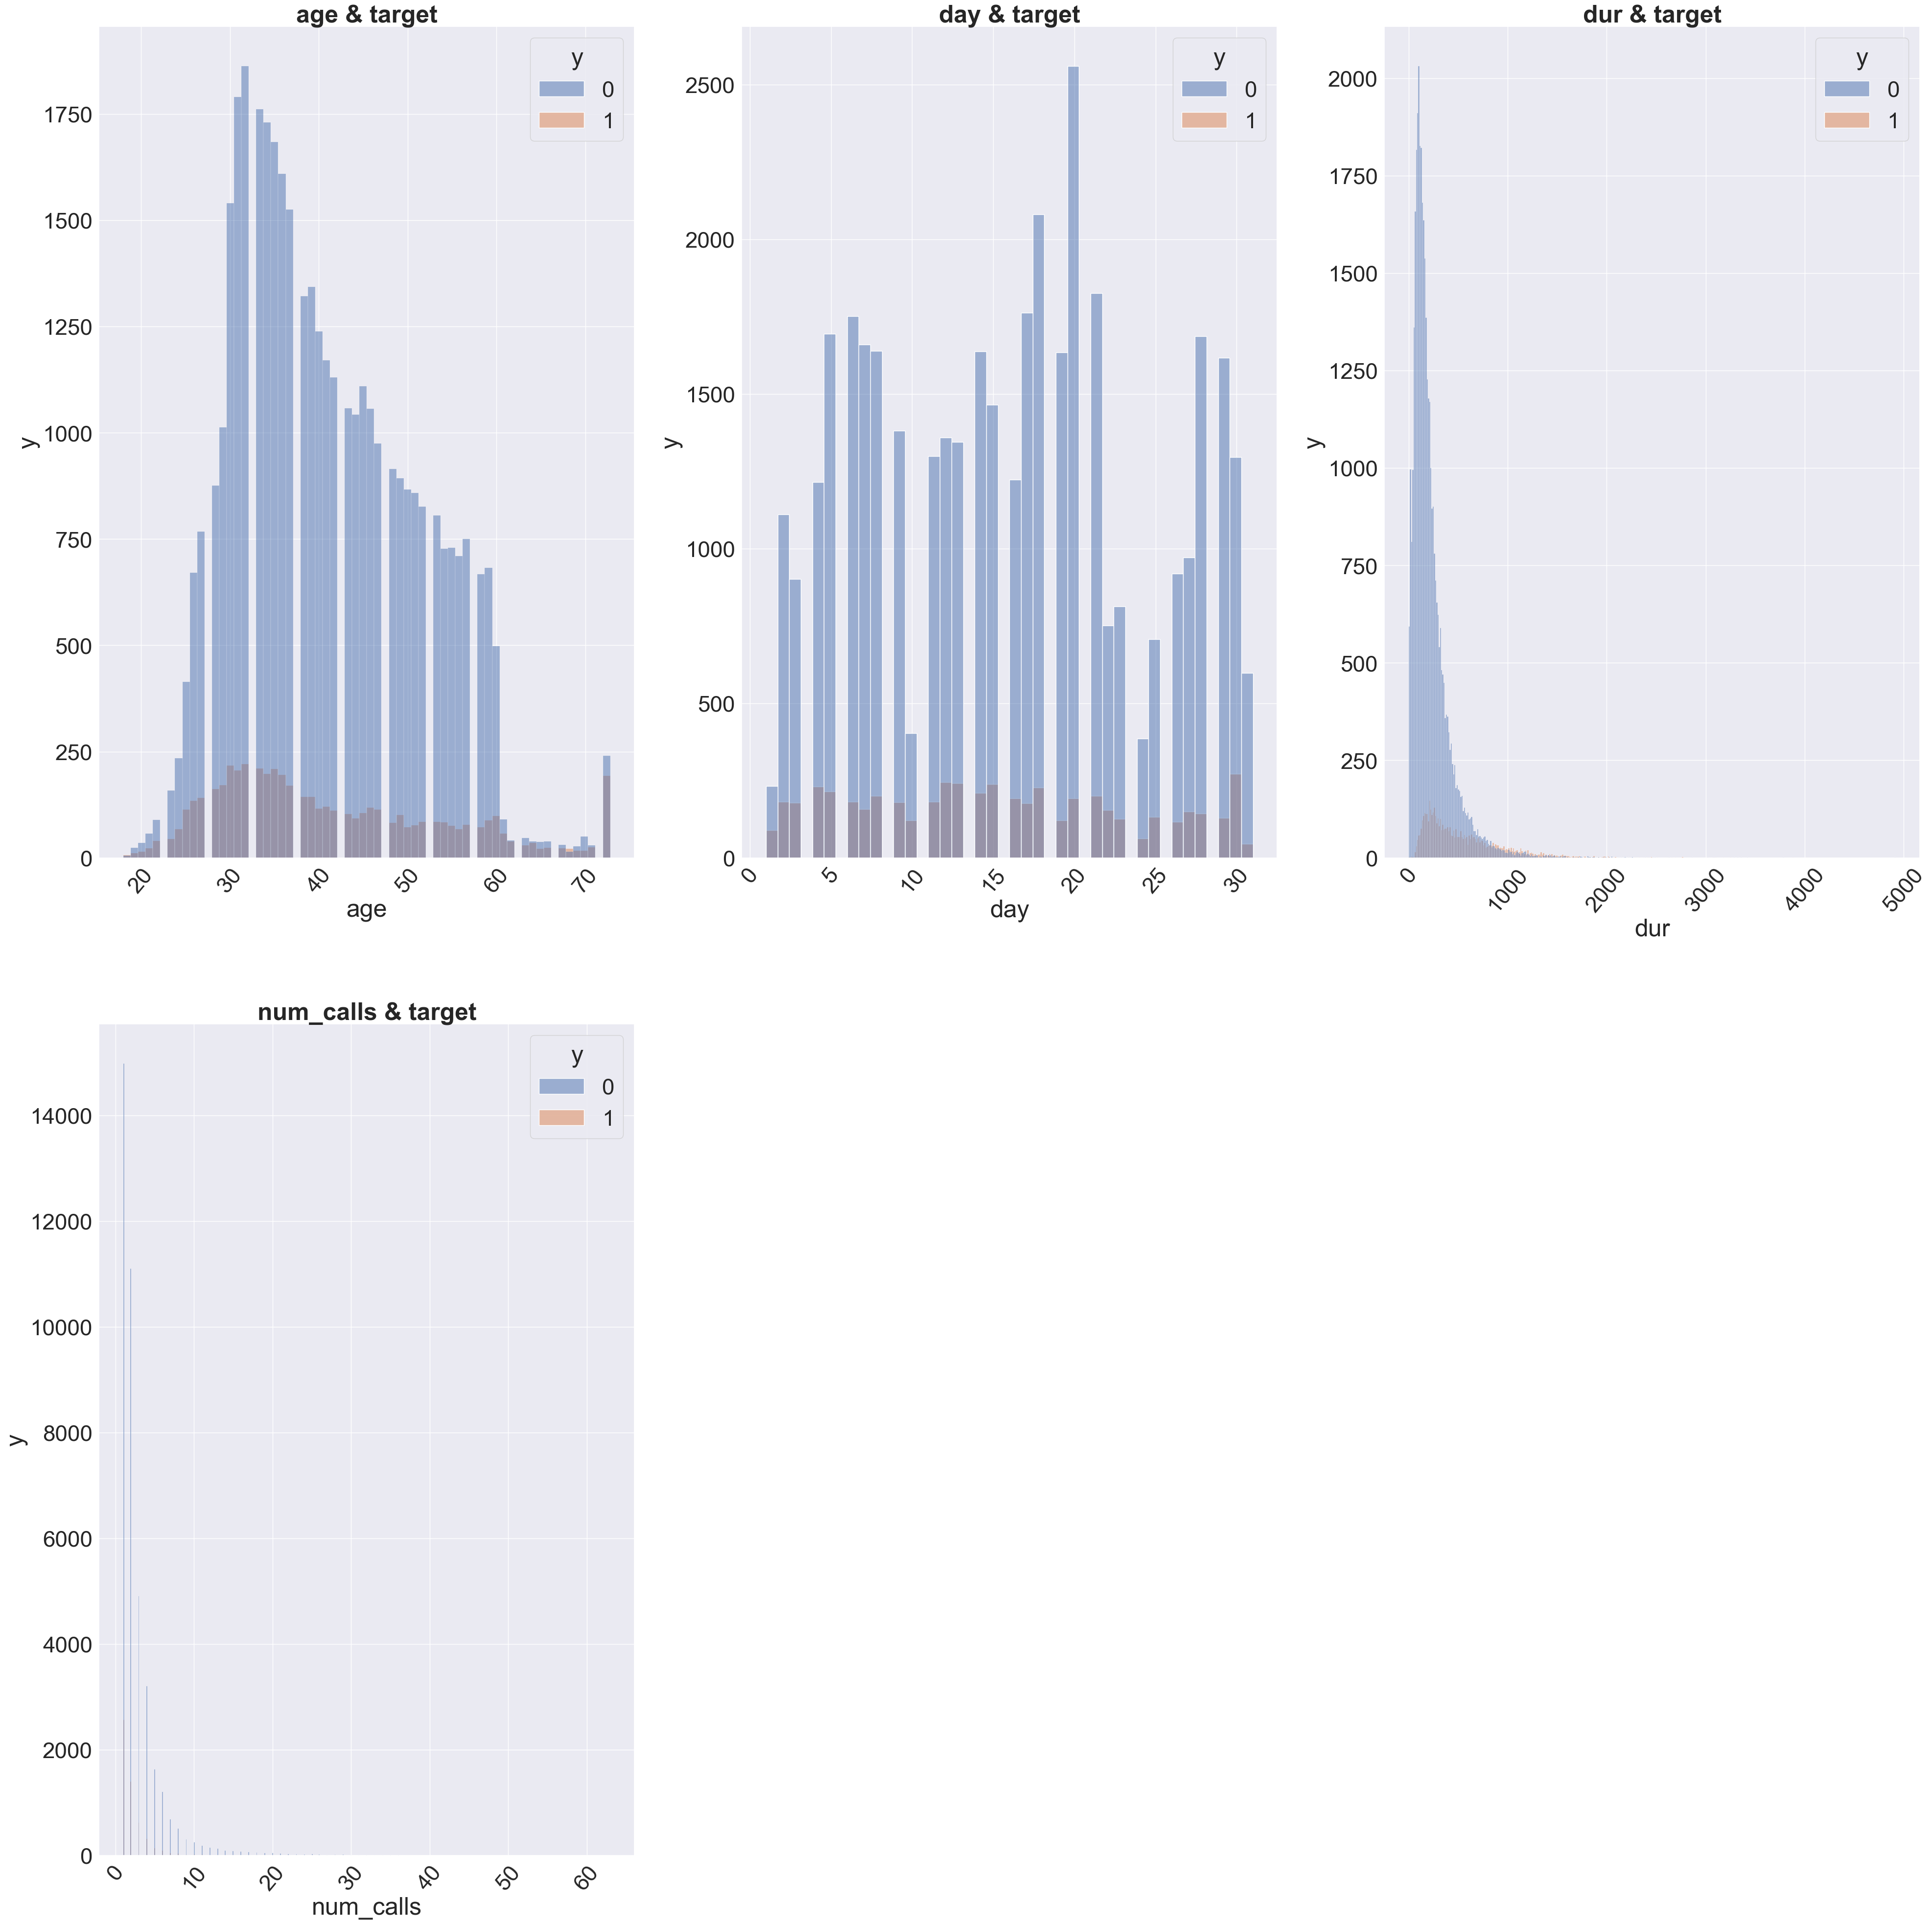

In [76]:
fig, axs = plt.subplots(ncols=7)
sb.set(font_scale=3)

#AGE
plt.subplot(3,3,1)
sb.histplot(x='age',hue='y',data=df)
plt.xlabel('age')
plt.ylabel('y')
plt.title('age & target',fontweight='bold')
plt.xticks(rotation=50)
fig.set_figheight(75)
fig.set_figwidth(48)


#DAY
plt.subplot(3,3,2)
sb.histplot(x='day',hue='y',data=df)
plt.xlabel('day')
plt.ylabel('y')
plt.title('day & target',fontweight='bold')
plt.xticks(rotation=50)
fig.set_figheight(75)
fig.set_figwidth(48)


#DURATION
plt.subplot(3,3,3)
sb.histplot(x='dur',hue='y',data=df)
plt.xlabel('dur')
plt.ylabel('y')
plt.title('dur & target',fontweight='bold')
plt.xticks(rotation=50)
fig.set_figheight(75)
fig.set_figwidth(48)


#NUMBER OF CALLS
plt.subplot(3,3,4)
sb.histplot(x='num_calls',hue='y',data=df)
plt.xlabel('num_calls')
plt.ylabel('y')
plt.title('num_calls & target',fontweight='bold')
plt.xticks(rotation=50)
fig.set_figheight(75)
fig.set_figwidth(48)

In [179]:
df.describe()

,age,education_qual,day,mon,dur,num_calls,y,target,call_type_cellular,call_type_telephone,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,45205.000000,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,...,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000
mean,40.937087,1.857339,15.80688,6.144586,258.183055,2.763898,0.117000,0.117000,0.647760,0.064285,...,0.221613,0.032895,0.027431,0.209203,0.050083,0.034930,0.091870,0.020750,0.168035,0.028824
std,10.619130,0.652213,8.32234,2.408153,257.538504,3.098189,0.321424,0.321424,0.477673,0.245263,...,0.415336,0.178363,0.163336,0.406744,0.218119,0.183604,0.288846,0.142548,0.373901,0.167314
min,18.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,8.00000,5.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,16.00000,6.000000,180.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.000000,21.00000,8.000000,319.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,3.000000,31.00000,12.000000,4918.000000,63.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## HANDLING DATA

In [189]:
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [190]:
j = 0
for i in ["age", "dur", "day","num_calls"]:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1 

In [191]:
df.describe()


,age,education_qual,day,mon,dur,num_calls,y,target,call_type_cellular,call_type_telephone,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
count,45205.000000,45205.000000,45205.00000,45205.000000,45205.00000,45205.000000,45205.000000,0.0,45205.000000,45205.000000,...,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000,45205.000000
mean,40.863666,1.857339,15.80688,6.144586,234.95620,2.392235,0.117000,NaN,0.647760,0.064285,...,0.221613,0.032895,0.027431,0.209203,0.050083,0.034930,0.091870,0.020750,0.168035,0.028824
std,10.380009,0.652213,8.32234,2.408153,176.75476,1.600152,0.321424,NaN,0.477673,0.245263,...,0.415336,0.178363,0.163336,0.406744,0.218119,0.183604,0.288846,0.142548,0.373901,0.167314
min,18.000000,1.000000,1.00000,1.000000,0.00000,1.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,8.00000,5.000000,103.00000,1.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,2.000000,16.00000,6.000000,180.00000,2.000000,0.000000,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,2.000000,21.00000,8.000000,319.00000,3.000000,0.000000,NaN,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,3.000000,31.00000,12.000000,643.00000,6.000000,1.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ENCODING THE DATA

In [192]:
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)


In [199]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

In [200]:
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,day,dur,num_calls
0,58,5,261,1
1,44,5,151,1
2,33,5,76,1
3,47,5,92,1
4,33,5,198,1


In [201]:
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)


C:\Users\Hari\AppData\Local\Temp\ipykernel_10992\611698582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

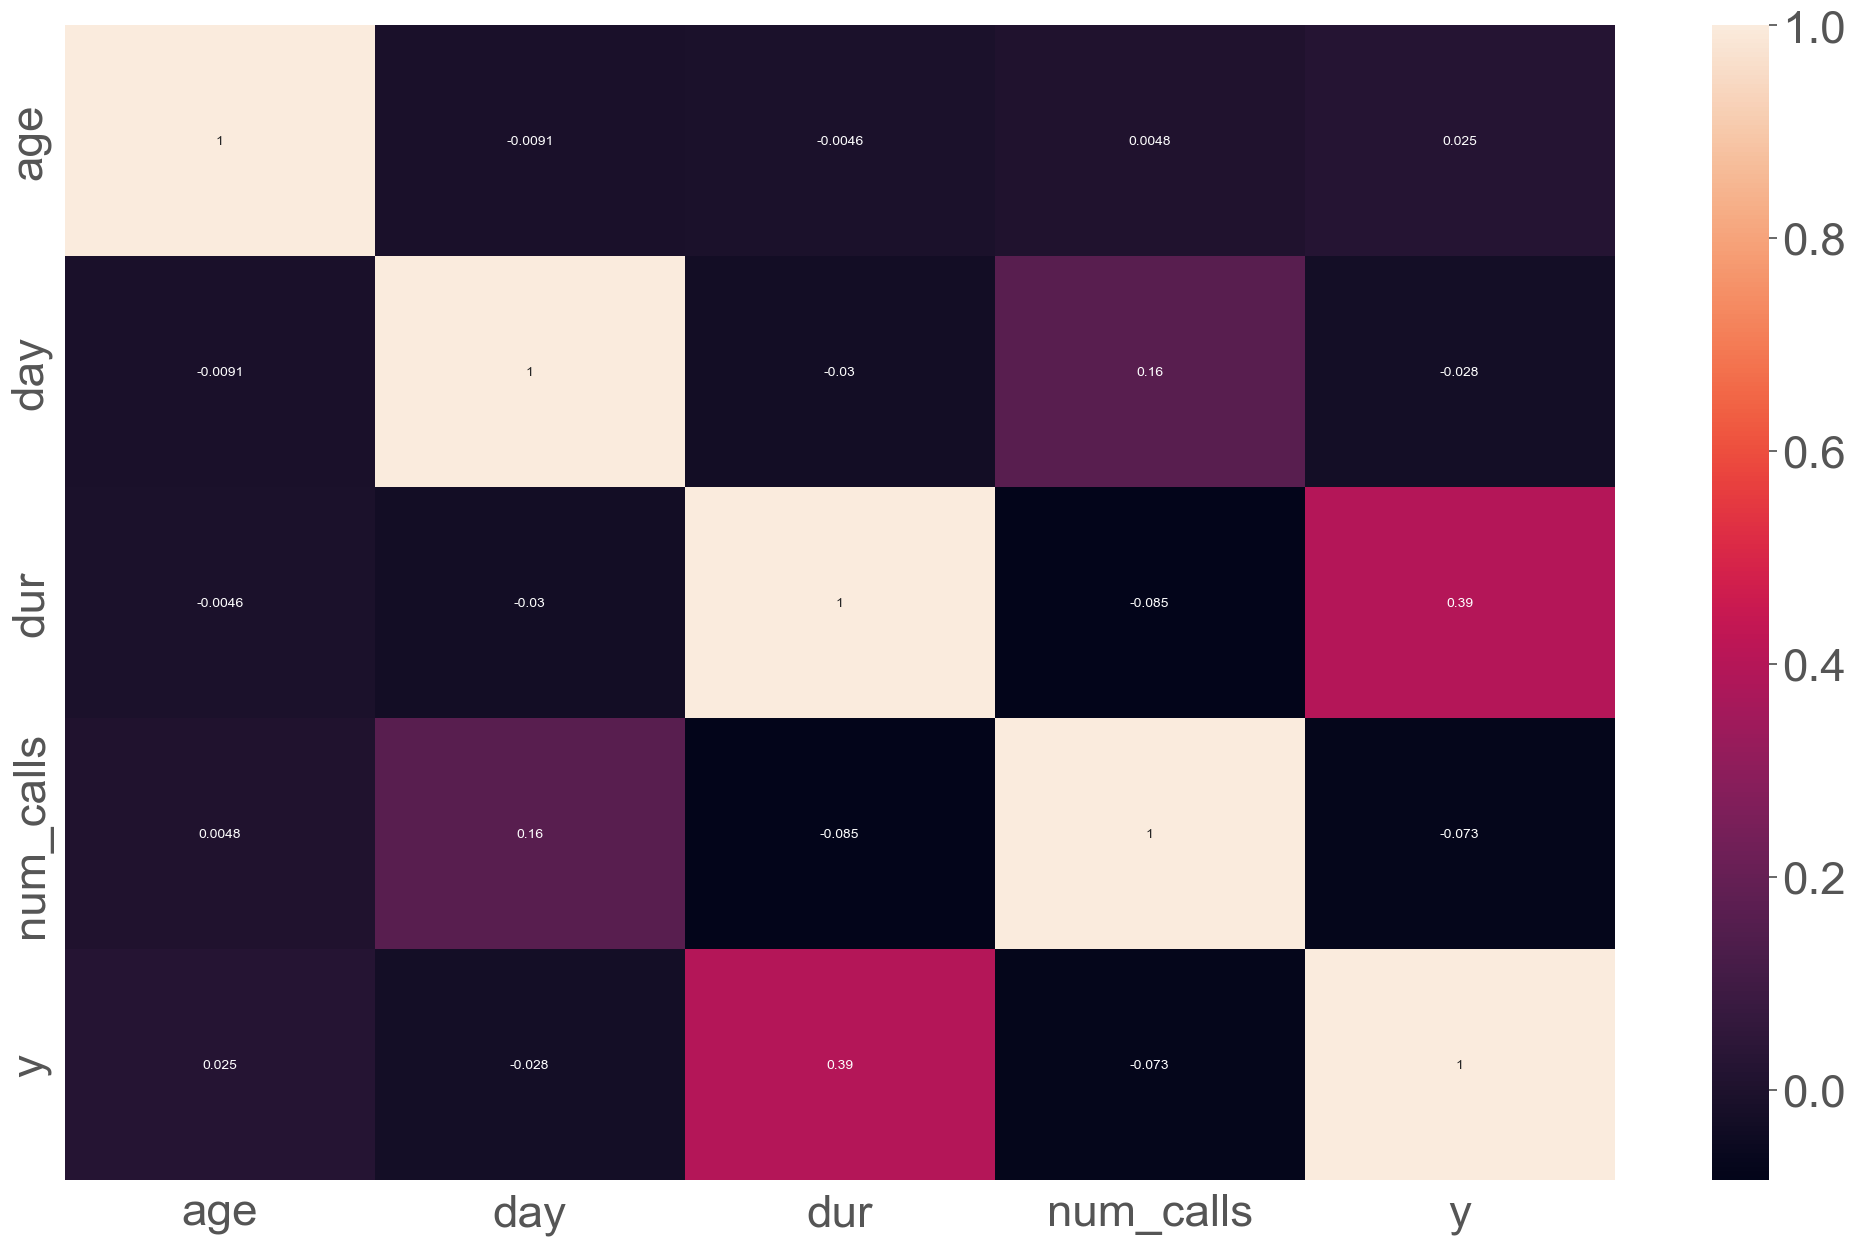

In [202]:
plt.figure(figsize=(25,15))
sb.heatmap(df.corr(), annot=True)

In [203]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)
     

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


In [204]:
for i in cat_var:
    print(i, ":", df[i].unique())
     

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [205]:
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [206]:
columns=['call_type','prev_outcome','marital','job']
df=encoding_data(df,columns)

In [207]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['mon'] = df['mon'].apply(
    lambda x: months.index(x)+1
)

In [208]:
df.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)


In [209]:
p= df.drop(['y'],axis=1)
q= df['y']

## SMOTE THE DATA

In [210]:
from imblearn.combine import SMOTETomek


### smote oversampling we are using due to the imbalance data

In [211]:
smote_tomek = SMOTETomek(sampling_strategy=0.75)
X, y = smote_tomek.fit_resample(p, q)


print(y.value_counts())

0    39522
1    29541
Name: y, dtype: int64


## SPLITING THE DATA

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## SCALING THE DATA

In [214]:
from sklearn.preprocessing import StandardScaler 


In [215]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELING THE DATA

####
LINEAR REGRESSION

XGBOOST 

RANDOM FOREST CLASSIFIER

In [216]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### LINEAR REGRESSION MODEL

In [218]:
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*95, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)




The accuracy of Logistic Regression is :  88.13895836075645 %
The aurroc_auc_score of Logistic Regression is :  0.9762725803679457


### RANDOM FOREST CLASSIFIER MODEL

In [222]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  93.61590101355797 %
The aurroc_auc_score of  random forest is :  0.9859505320549806


### XG BOOST MODEL

In [221]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)
     


The accuracy of X Gradient Boosting is :  93.58518713527269 %
The aurroc_auc_score of Gradient Boosting is :  0.986547048326336


### FEATURE IMPORTANCE IN rf_MODEL

<Axes: >

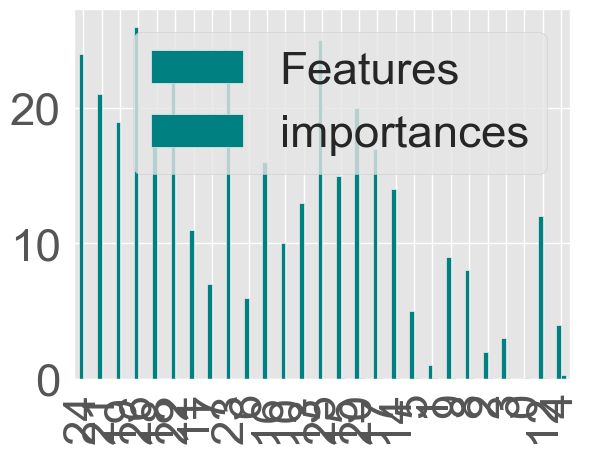

In [223]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')
df1.plot.bar(color='teal')

## (ROC) receiver operating characteristic

### TO COMPARE THE THE AUROC CURVE

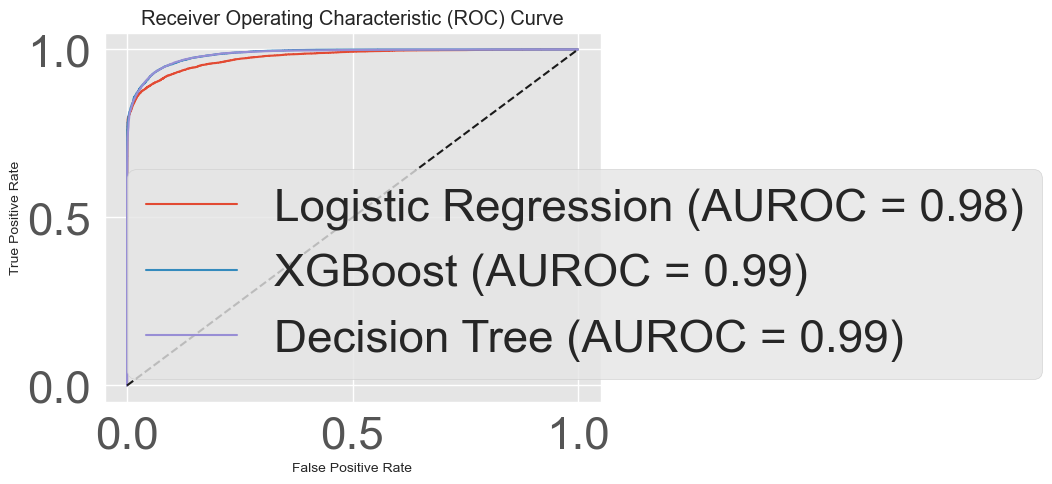

In [224]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_pred_prob)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_pred_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)

# Plot ROC curves
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUROC = {log_reg_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUROC = {xgb_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUROC = {dt_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## CONCLUSION

>the results obtained from the evaluation of the three classification models (Logistic Regression, XGBoost, and Decision Tree Classifier) on the given historical data, XGBoost outperformed the other models with the highest accuracy score of 93.54% and the highest AUROC score of 0.98

>This implies that XGBoost is a suitable model for predicting whether a client will subscribe to the insurance or not. It is recommended to deploy this model in the production environment to accurately target potential customers and optimize marketing costs.

>there is a further analysis is recommended to identify the important features contributing to the model's performance and to fine-tune the model for better results.